In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#create database connection
conn = sqlite3.connect('chinook.db')

We are going to extract and analyze data from the following database.

### Database Diagram

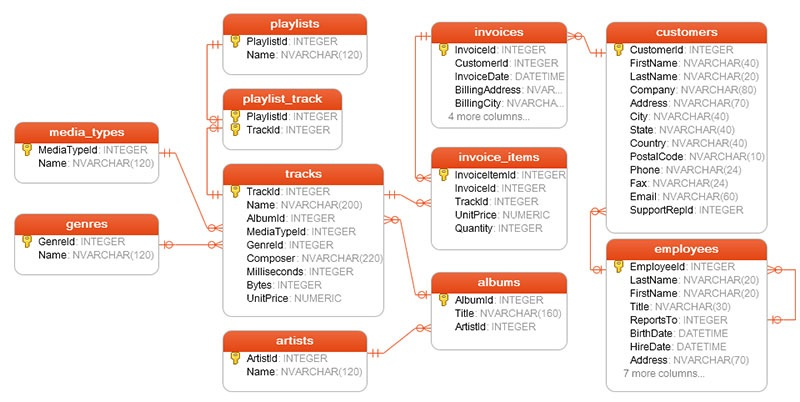

### Top 10 Countries by Number of Customers

In [3]:
sql_query = """SELECT Country, COUNT(CustomerId) AS Num_of_Customers 
                FROM customers 
                GROUP BY Country
                ORDER BY COUNT(CustomerId) DESC LIMIT 10"""

pd.read_sql_query(sql_query, conn)

,Country,Num_of_Customers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Sweden,1


### Top 10 Customers by Purchase Amount

In [4]:
sql_query = """SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.UnitPrice * ii.Quantity) as TotalAmount
                FROM customers AS c 
                JOIN invoices AS i on c.CustomerId = i.CustomerId
                JOIN invoice_items AS ii on i.invoiceid = ii.invoiceid
                GROUP BY c.FirstName
                ORDER BY TotalAmount DESC LIMIT 10"""

df_customer_purchase = pd.read_sql_query(sql_query, conn)
df_customer_purchase

,CustomerId,FirstName,LastName,TotalAmount
0,16,Frank,Harris,81.24
1,14,Mark,Philips,75.24
2,6,Helena,Holý,49.62
3,26,Richard,Cunningham,47.62
4,57,Luis,Rojas,46.62
5,45,Ladislav,Kovács,45.62
6,46,Hugh,O'Reilly,45.62
7,37,Fynn,Zimmermann,43.62
8,28,Julia,Barnett,43.62
9,25,Victor,Stevens,42.62


### Top 10 Best-selling Albums & Artists

In [5]:
sql_query = """SELECT ar.Name AS Artist, al.Title AS Album, COUNT(al.AlbumId) AS Sales
                FROM albums AS al 
                JOIN artists AS ar ON al.ArtistId = ar.ArtistId
                JOIN tracks as tr ON al.AlbumId = tr.AlbumId
                JOIN invoice_items AS ii ON tr.TrackId = ii.TrackId
                GROUP BY al.Title
                ORDER BY Sales DESC LIMIT 10"""

pd.read_sql_query(sql_query, conn)

,Artist,Album,Sales
0,Chico Buarque,Minha Historia,27
1,Lenny Kravitz,Greatest Hits,26
2,Eric Clapton,Unplugged,25
3,Titãs,Acústico,22
4,Kiss,Greatest Kiss,20
5,Caetano Veloso,Prenda Minha,19
6,The Who,My Generation - The Very Best Of The Who,19
7,Creedence Clearwater Revival,"Chronicle, Vol. 2",19
8,Green Day,International Superhits,18
9,Creedence Clearwater Revival,"Chronicle, Vol. 1",18


### Sales by Date

In [6]:
# extract sales by date

sql_query = """SELECT i.InvoiceDate as Date, COUNT(ii.Quantity) AS Sales
FROM invoices AS i
JOIN invoice_items AS ii ON i.InvoiceId = ii.InvoiceId
GROUP BY Date
"""
salebydate = pd.read_sql_query(sql_query, conn)
salebydate.head()

,Date,Sales
0,2009-01-01 00:00:00,2
1,2009-01-02 00:00:00,4
2,2009-01-03 00:00:00,6
3,2009-01-06 00:00:00,9
4,2009-01-11 00:00:00,14


In [7]:
salebydate['Date'] = salebydate['Date'].astype('datetime64')

# insert month and year
salebydate['Month'] = salebydate['Date'].dt.month
salebydate['Year'] = salebydate['Date'].dt.year
salebydate.head()

,Date,Sales,Month,Year
0,2009-01-01,2,1,2009
1,2009-01-02,4,1,2009
2,2009-01-03,6,1,2009
3,2009-01-06,9,1,2009
4,2009-01-11,14,1,2009


### Sale by Year

In [8]:
salebyyear = salebydate.groupby('Year', as_index=False)['Sales'].sum()
salebyyear

,Year,Sales
0,2009,454
1,2010,455
2,2011,442
3,2012,447
4,2013,442


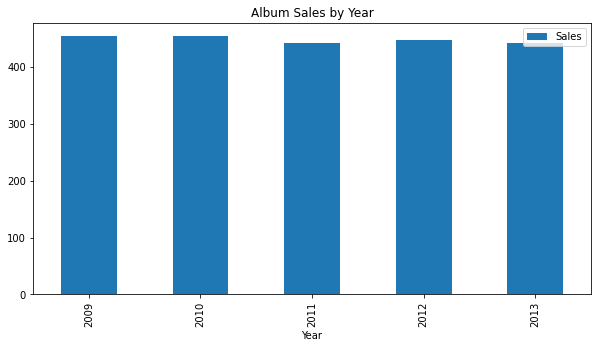

In [9]:
ax = salebyyear.plot(kind='bar', x='Year', y='Sales', title='Album Sales by Year', figsize=(10,5))
#ax.set_ylim(ymin=0)
plt.show()

In [10]:
# close database connection
conn.close()